### **Student Details**
Name: Vishal Pattar  
Roll no: 43556  
Class: BE AIML  
Subject: Deep Learning for AI  
Assignment: 4

### **Problem Statement:**

Use an Autoencoder to implement anomaly detection. Build the model by performing the following steps:
- Import required libraries
- Upload/access the dataset
- The encoder converts it into a latent representation
- Decoder networks convert it back to the original input
- Compile the models with Optimizer, Loss, and Evaluation Metrics

Use a suitable dataset such as the MNIST dataset, treating a specific digit (e.g., '0') as anomalies.

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test  = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [4]:
# Identify normal data (digits 1-9) and anomalies (digit 0)
normal_train = x_train[y_train != 0]
normal_test = x_test[y_test != 0]
anomalies_test = x_test[y_test == 0]

In [5]:
# Define the Autoencoder architecture
input_dim = normal_train.shape[1]
encoding_dim = 32  # Dimension of latent space

autoencoder = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(encoding_dim, activation='relu'),
    Dense(64, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])

In [6]:
autoencoder.compile(optimizer=Adam(),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [7]:
history = autoencoder.fit(normal_train, normal_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(normal_test, normal_test))

Epoch 1/50
212/212 [==============================] - 3s 7ms/step - loss: 0.2565 - accuracy: 0.0126 - val_loss: 0.1789 - val_accuracy: 0.0082
Epoch 2/50
212/212 [==============================] - 1s 6ms/step - loss: 0.1604 - accuracy: 0.0126 - val_loss: 0.1442 - val_accuracy: 0.0119
Epoch 3/50
212/212 [==============================] - 2s 8ms/step - loss: 0.1364 - accuracy: 0.0141 - val_loss: 0.1278 - val_accuracy: 0.0139
Epoch 4/50
212/212 [==============================] - 2s 8ms/step - loss: 0.1252 - accuracy: 0.0131 - val_loss: 0.1191 - val_accuracy: 0.0131
Epoch 5/50
212/212 [==============================] - 1s 6ms/step - loss: 0.1174 - accuracy: 0.0113 - val_loss: 0.1129 - val_accuracy: 0.0123
Epoch 6/50
212/212 [==============================] - 1s 6ms/step - loss: 0.1127 - accuracy: 0.0115 - val_loss: 0.1095 - val_accuracy: 0.0164
Epoch 7/50
212/212 [==============================] - 2s 8ms/step - loss: 0.1097 - accuracy: 0.0109 - val_loss: 0.1069 - val_accuracy: 0.0137
Epoch 

In [8]:
# Compute reconstruction loss on test data
reconstructions = autoencoder.predict(normal_test)
mse = np.mean(np.power(normal_test - reconstructions, 2), axis=1)

282/282 [==============================] - 1s 3ms/step


In [9]:
# Compute reconstruction loss on anomalies
reconstructions_anomaly = autoencoder.predict(anomalies_test)
mse_anomaly = np.mean(np.power(anomalies_test - reconstructions_anomaly, 2), axis=1)

31/31 [==============================] - 0s 4ms/step


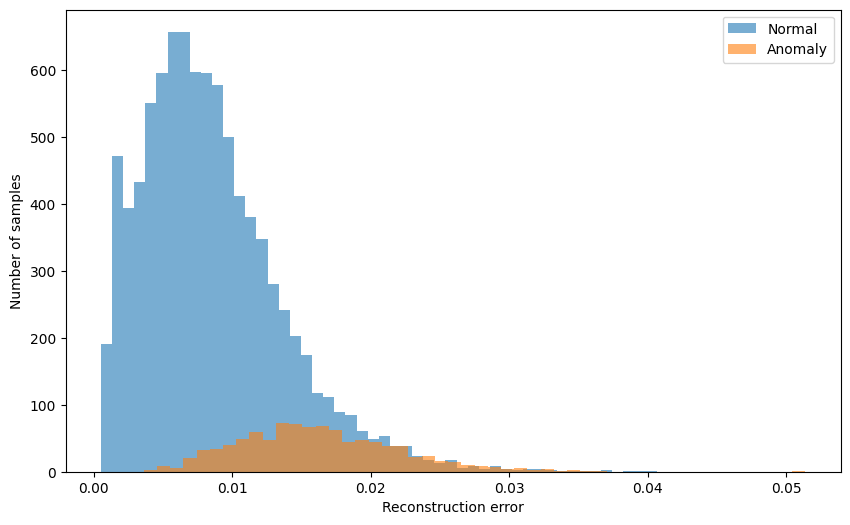

In [10]:
# Plot the distribution of reconstruction errors
plt.figure(figsize=(10,6))
plt.hist(mse, bins=50, alpha=0.6, label='Normal')
plt.hist(mse_anomaly, bins=50, alpha=0.6, label='Anomaly')
plt.xlabel('Reconstruction error')
plt.ylabel('Number of samples')
plt.legend()
plt.show()

In [11]:
# Set a threshold for anomaly detection
threshold = np.percentile(mse, 95)
print(f'Anomaly Detection Threshold: {threshold}')

Anomaly Detection Threshold: 0.018096868414431807


In [12]:
# Predict anomalies
predictions = np.concatenate([mse, mse_anomaly])
labels = np.concatenate([np.zeros(len(mse)), np.ones(len(mse_anomaly))])

In [13]:
# Compute metrics
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = (predictions > threshold).astype(int)
precision = precision_score(labels, y_pred)
recall    = recall_score(labels, y_pred)
f1        = f1_score(labels, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.4218
Recall: 0.3357
F1 Score: 0.3739
